# Residential Property Price Index Versus

# Wholesale Price Index for Building & Construction Materials

The wholesale price index for building and construction materials (WPI_BCM) measures the input costs of house construction, while the residential property price index (RPPI) measures the selling price to property buyers. We would expect a strong positive relationship between these two indexes, because for almost any consumption good, input costs typically strongly affect the selling price.   

I will also exclude other external factors that can affect selling prices, including disposable income levels, mortgage interest relief, banks willingness to lend, property-related taxes and so on. Furthermore, one large input cost that I'm excluding is of course the cost of land, because some believe that the cost of land is derived from the selling price of houses, that is high selling prices drive up the cost of land, as opposed to cost of land driving up house prices.

In the measurement of building and construction materials by the Central Statistics Office (CSO), information is collated on a series of iterms including stone, sand and gravel, Ready mixed mortar, concrete blocks and bricks, structural steel and reinforcing metal, timber, Wooden windows and doors, bituminous macadam, asphalt and bituminous emulsions, electrical fittings, lighting equipment, protection and communication equipment, plumbing materials including sanitary ware, HVAC (heating and ventilation equipment), insulating materials, pipes and fittings, plaster, paints, oils and varnishes, glass, and all other metal fittings. The CSO give both an overall collective measurement called "Materials" and also individual values for each item. For simplicity, I will focus on the collective measurement. 

One issue that I have with this index is that the first observation was as recent as January 2015 while its latest observation was September 2024. Therefore my analysis will be confined to this relatively short period, however I still think this period of time is sufficient to prove or disapprove there is a strong relationship between the input costs and the sales price of a house.

More on this index can be found ([here] (https://data.gov.ie/dataset/wpm28-wholesale-price-index-excl-vat-for-building-and-construction-materials))


The residential property price index (RPPI) - according to the CSO - is designed to measure the change in the average level of prices paid by households for residential properties sold in Ireland. The RPPI specifically excludes non-household purchases, non-market purchases and self-builds (that is, where the land is purchased separately). The index is mix-adjusted to allow for the fact that different types of property are sold in different months.  

The RPPI for all dwellings is split into two higher level geographical areas: Dublin and Ireland excluding Dublin (or Rest of Ireland). These regional aggregates are further broken down by type of dwelling, i.e. houses and apartments. Furthermore, house price indexes are broke down further, for Dublin there is the four adminsitrative areas Dublin City, Dún Laoghaire-Rathdown, Fingal, and South Dublin, while for outside Dublin ther are indexes for border (Cavan, Donegal, Leitrim, Monaghan, and Sligo), midlands (Laois, Longford, Offaly, and Westmeath), west (Galway, Mayo, and Roscommon), mid-east (Kildare, Louth, Meath, and Wicklow), mid-west (Clare, Limerick, and Tipperary), south-east (Carlow, Kilkenny, Waterford, and Wexford), and south-west (Cork and Kerry). 

For simplicity, I'm going with the collective measurement "National - all residential properties" because I'm going to assume that the relationship should be relatively consistent across all regions.

The CSO have been recording these prices since February 2025 with the latest observation being September 2025. However, given that the observations for the WPI-BCM only stretch from 2015 to 2024, I will be using only a similar portion of RPPI observations.

More information on this index cvan be found ([here](https://www.cso.ie/en/releasesandpublications/ep/p-rppi/residentialpropertypriceindexseptember2025/backgroundnotes/)) and ([here](https://data.gov.ie/dataset/hpm09-residential-property-price-index)).


### External Python Packages That I Will Use

In [1]:
# I will want pandas to manipulate my data
import pandas as pd 

# I will want numpy for calculating the descriptive statistics
import numpy as np

# I will want matplotlib to plot my data
import matplotlib.pyplot as plt

# I will want scipy to perform statistical tests
from scipy import stats

### Data Sources


The CSO provides CSV files for both of these indexes.

HPM09.20251124175125.csv - Residential_property_price_index
https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPM09/CSV/1.0/en

WPM28.20251124175238.csv - Wholesale Price Index (Excl VAT) for Building and Construction Materials 
https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/WPM28/CSV/1.0/en




Gathering the Data.
RPPI -
    - It has monthly data from February 2005 to Sept 2025, 
      but to be able to regress against WPI&BCM 
      I will run Sept 2014 to Sept 2014
    - I will remove all the months February 2005 to August 2014 (or not select to import them)

It also has many categories, so i will filter for National - all residential properties
I will be taking index data
I will also ignore all the data talking about the % Change over 12 months for Residential Property Price Index.

WPI-BCM
only goes up to 202409 from 201501
so will probably do Sept 14 to Sept 24

I will filter for the entry of Materials, ignoring the figures for every other category

Cleaning the Data
I will look use the ISNA function to check and replace that i have figures for every entry

Plotting the data, line charts, or indeed regression, 
this should show the posiitve relationship between both sets of data.
Explain, how i could not just pick out any one material because i don't know the proportion that goes into the house, though I could guess.

Investigate - there might be a way of seeing if there is a lagging trend.
Time series data, so need to get the axis working correctly.


### Reading in the Data
I will read in the data in a the form of CSV files from data.gov.ie

#### RPPI

In [2]:
url_rppi = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPM09/CSV/1.0/en"

# I will first list all the column headers that I want to import from the CSV file
names_rppi = ["STATISTIC", "Statistic Label", "TLIST(M1)", "Month", "C02803V03373","Type of Residential Property","UNIT", "VALUE"]

# Now I will read the CSV file from the URL into a pandas DataFrame, assigning the columns names I specified above
df_rppi = pd.read_csv(url_rppi,header=0,usecols=names_rppi)

# Unfortunately I have many extraneous rows, rows that contain "Percentage Change over 1,3, and 12 months for Residential Property Price Index"
# so let's remove them using regular expressions
df_rppi = df_rppi[df_rppi["Statistic Label"] == "Residential Property Price Index"]

# Furthermore, as I alluded to earlier, the CSO measures many regions whereas I'm only interested in the collective measurement.
# Each of these materials has a unique code in the "C02803V03373" column, with the exception of the collective measurement which is indicated by a "-"
# So again using regular expressions, I will remove every row that does not contain "-" in the "C02803V03373" column
df_rppi = df_rppi[df_rppi["C02803V03373"] == "-"]

# Just to view the structure of the DataFrame and the data types of each column
df_rppi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 4960
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATISTIC                     249 non-null    object 
 1   Statistic Label               249 non-null    object 
 2   TLIST(M1)                     249 non-null    int64  
 3   Month                         249 non-null    object 
 4   C02803V03373                  249 non-null    object 
 5   Type of Residential Property  249 non-null    object 
 6   UNIT                          249 non-null    object 
 7   VALUE                         249 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 17.5+ KB


In [3]:
# There are some columns that I originally needed to be able to run regular expressions on them to remove some rows
# but now they are no longer needed I can drop them and any other extraneous columns
cols_to_drop=  ["STATISTIC", "Statistic Label", "Month","C02803V03373","Type of Residential Property","UNIT"]
df_rppi = df_rppi.drop(columns=cols_to_drop)

In [4]:
# It can be seen from the info output above that the "TLIST(M1)" column is of type integer.
# To use it as my index, I must convert it to a datetime type.
# First I convert it to a string, then I append "01" to the end of each string (to represent the first day of the month),
# and then convert the YYYYMMDD to datetime type

df_rppi["TLIST(M1)"] = df_rppi["TLIST(M1)"].astype("str")
df_rppi["TLIST(M1)"]= df_rppi["TLIST(M1)"]+"01"
df_rppi["TLIST(M1)"] = df_rppi["TLIST(M1)"].astype("datetime64[ns]")


# I have now only two columns, TLIST(M1) and VALUE so I will rename them appropriately
names=["Date","RPPI_Value"]
df_rppi.columns = names

# Now I will set the Date column as the index of the DataFrame
df_rppi.index = pd.DatetimeIndex(df_rppi["Date"])

# there looks to be duplication of the Date column so i will drop the duplicate
df_rppi = df_rppi.drop(columns="Date")

# I only want data from Jan 2015 to Sep 2024 so I will filter the DataFrame accordingly
df_rppi = df_rppi.loc[df_rppi.index > '2014-12-01']
df_rppi = df_rppi.loc[df_rppi.index < '2024-10-01']


# Take a look at the first and last few rows of the DataFrame
print(f"{df_rppi.tail()}\n")
#print(f"{df_wpi_bcm.head()}\n")

# I'm just going to save the cleaned DataFrame to a CSV file so I can see it more easily
df_rppi.to_csv("rppi_data.csv")

            RPPI_Value
Date                  
2024-05-01       180.0
2024-06-01       181.7
2024-07-01       183.9
2024-08-01       185.6
2024-09-01       187.0



#### WPI_BCM

In [5]:
url_wpi_bcm = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/WPM28/CSV/1.0/en"

# I will first list all the column headers that I want to import from the CSV file
names_wpi_bcm = ["STATISTIC", "Statistic Label", "TLIST(M1)", "Month", "C01409V03262","Type of Material","UNIT", "VALUE"]

# Now I will read the CSV file from the URL into a pandas DataFrame, assigning the columns names I specified above
df_wpi_bcm = pd.read_csv(url_wpi_bcm,header=0,usecols=names_wpi_bcm)

# Unfortunately I have many extraneous rows, rows that contain "Percentage Change over 1, 12 month (months) in Wholesale Price Index" and so on
# so I will remove them using regular expressions

# Every row that does not contain "Wholesale Price Index (Excl VAT) for Building and Construction Materials" in the "Statistic Label" column will be removed
df_wpi_bcm = df_wpi_bcm[df_wpi_bcm["Statistic Label"] == "Wholesale Price Index (Excl VAT) for Building and Construction Materials"]

# Furthermore, as I alluded to earlier, the CSO measures many construction materials whereas I'm only interested in the collective measurement.
# Each of these materials has a unique code in the "C01409V03262" column, with the exception of the collective measurement which is indicated by a "-"
# So again using regular expressions, I will remove every row that does not contain "-" in the "C01409V03262" column
df_wpi_bcm = df_wpi_bcm[df_wpi_bcm["C01409V03262"] == "-"]

df_wpi_bcm.info()





<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 4640
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         117 non-null    object 
 1   Statistic Label   117 non-null    object 
 2   TLIST(M1)         117 non-null    int64  
 3   Month             117 non-null    object 
 4   C01409V03262      117 non-null    object 
 5   Type of Material  117 non-null    object 
 6   UNIT              117 non-null    object 
 7   VALUE             117 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 8.2+ KB


In [6]:
# There are some columns that I originally needed to be able to run regular expressions on them to remove some rows
# but now they are no longer needed I can drop them and any other extraneous columns
cols_to_drop=  ["STATISTIC", "Statistic Label", "Month", "C01409V03262","Type of Material","UNIT"]
df_wpi_bcm = df_wpi_bcm.drop(columns=cols_to_drop)

In [7]:
# It can be seen from the info output above that the "TLIST(M1)" column is of type integer.
# To use it as my index, I must convert it to a datetime type.
# First I convert it to a string, then I append "01" to the end of each string (to represent the first day of the month),
# and then convert the YYYYMMDD to datetime type

df_wpi_bcm["TLIST(M1)"] = df_wpi_bcm["TLIST(M1)"].astype("str")
df_wpi_bcm["TLIST(M1)"]= df_wpi_bcm["TLIST(M1)"]+"01"
df_wpi_bcm["TLIST(M1)"] = df_wpi_bcm["TLIST(M1)"].astype("datetime64[ns]")

# I have now only two columns, TLIST(M1) and VALUE so I will rename them appropriately
names=["Date","WPI_BCM_Value"]
df_wpi_bcm.columns = names

# Now I will set the Date column as the index of the DataFrame
df_wpi_bcm.index = pd.DatetimeIndex(df_wpi_bcm["Date"])

# there looks to be duplication of the Date column so i will drop the duplicate
df_wpi_bcm = df_wpi_bcm.drop(columns="Date")

# I only want data from Jan 2015 to Sep 2024 so I will filter the DataFrame accordingly
df_wpi_bcm = df_wpi_bcm.loc[df_wpi_bcm.index > '2014-12-01']
df_wpi_bcm = df_wpi_bcm.loc[df_wpi_bcm.index < '2024-10-01']

# Take a look at the first and last few rows of the DataFrame
print(f"{df_wpi_bcm.tail()}\n")
#print(f"{df_wpi_bcm.head()}\n")

# I'm just going to save the cleaned DataFrame to a CSV file so I can see it more easily
df_wpi_bcm.to_csv("wpi_bcm_data.csv")

            WPI_BCM_Value
Date                     
2024-05-01          144.3
2024-06-01          144.7
2024-07-01          144.9
2024-08-01          144.6
2024-09-01          144.8



### Analysing the Data

My analysis will first take the form of plotting both the RPPI and the WPI_BCM over time to see if there is a visible relationship. Given inflation over the last ten years has been positive, especially in the property market, I'm expecting to see two upward sloping lines, however the question will be on how similarly sloped the lines will be. Should both lines increase at relatively similar slopes, it would suggest there might be a strong relationship between them.

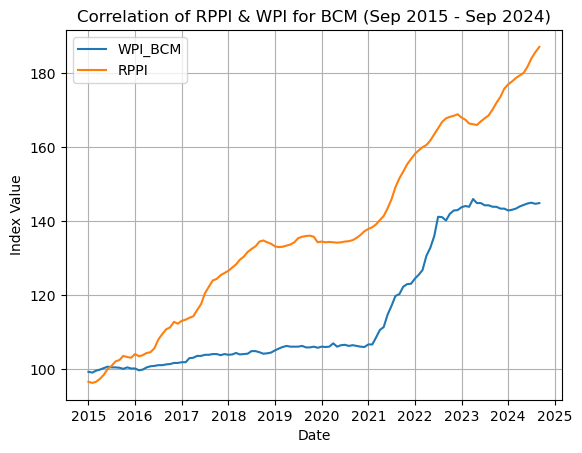

In [8]:
# Currently I have two separate dataframes, it should be easier to merge them both to the one dataframe
# especially considering they have the same index (date timeframe)

# The merging of two dataframes can be done with the concatenation function. 
# More on this can be found ([here] (https://pandas.pydata.org/docs/user_guide/merging.html))
combined_df = pd.concat([df_rppi, df_wpi_bcm], axis=1)

# Just so I can see how the dataframe looks like, I'm exporting the dataframe to a CSV file.
combined_df.to_csv("combined_rppi_wpi_bcm_data.csv")

# Plotting the lines
x = combined_df.index # this is my date column
y1 = combined_df["WPI_BCM_Value"] # these are the index values for the WPI_BCM
y2 = combined_df["RPPI_Value"] # these are the index values for the RPPI   

# The plotting of the lines can be done using pandas pyplot. 
# More on this can be found ([here] (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html))

plt.plot(x, y1, y2) # this is telling the pyplot what variables I want to plt
plt.xlabel("Date") # this is the name of the x-axis
plt.ylabel("Index Value") # this is the name of the y-axis
plt.title("Correlation of RPPI & WPI for BCM (Sep 2015 - Sep 2024)")
plt.legend(["WPI_BCM","RPPI"]) # these are the two variables I want shown in the legend
plt.grid(True) # I just want to include the lines because it's easier to read
plt.show()


### Deduction from the Chart
There is undeniably a correlation between the two indexes, but whether one can say there is a causality is far from uncertain. For example, the RPPI grew strongly between 2015 and 2019 while the WPI_BCM was relatively flat over the same period. Yes, the WPI_BCM grew strongly between 2021 and 2023 similar to the RPPI but was the cause of both these increases related to COVID-19? Clearly, from the data at hand, I cannot be definitive.

### Regression Analysis
Now, I will regress the RPPI against the WPI_BCM to see if a relationship can be determined.

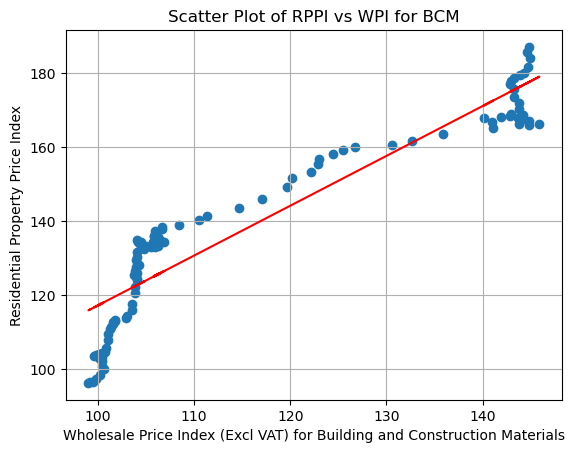

My Summary Statistics are as follows:
Slope:		 1.3462162700326643
Intercept:	 -17.449959306745882
R-value:	 0.9223637355956088
P-value:	 2.5372149694915646e-49
Standard Error:  0.05257917810073235


In [9]:
# As before, I have my combined dataframe.
combined_df = pd.concat([df_rppi, df_wpi_bcm], axis=1)

# This time, I will assign my explanatory variable to be the WPI_BCM and my determined variable to be the RPPI
x = combined_df["WPI_BCM_Value"]
y = combined_df["RPPI_Value"]    

# I will now perform a linear regression on my two variables.
# More on performing linear regression in python can be found ([here](https://www.w3schools.com/python/python_ml_linear_regression.asp))

# Here i use the line regression function from Scipy
slope, intercept, r, p, std_err = stats.linregress(x, y)

# In that example from w3w schools, they use a function to create the equation of a line
# I pass in each observation of the WPI_BCM variable, and it multiples it by the slopw and adds the intercept
# to give me my estimated value of the RPPI variabel. A line can then be drawn through all these points
def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))


plt.scatter(x, y) # these plots the variables observations
plt.plot(x, mymodel, color='red') # this is the equation of the line above
plt.xlabel("Wholesale Price Index (Excl VAT) for Building and Construction Materials") # label for the x-axis
plt.ylabel("Residential Property Price Index") # label for the y-axis
plt.title("Scatter Plot of RPPI vs WPI for BCM") #  chart title
plt.grid(True) # again I'm showing the grid to make it easier to read
plt.show()

print(f"My Summary Statistics are as follows:")
print(f"Slope:\t\t {slope}")
print(f"Intercept:\t {intercept}")
print(f"R-value:\t {r}")
print(f"P-value:\t {p}")
print(f"Standard Error:  {std_err}")


### Deduction from the Chart
The chart shows a strong positive relationship, consistent with my last chart. The red line shows how strong the correlation is, there are very few outliers. The summary statistics show an R-value of 0.92, which says that the WPI_BCM explains 92% of the value of the RPPI. There is a relatively strong probability value and a very low standard error, which again suggests a very strong regression model. However, I do think that it would be a mistake to assume that the relationship is this strong, there are no doubt other external factors such as Covid-19, high inflation, and strong immigration that have led to both indexes increasing and thereby giving the false impression that the WPI_BCM explains 92% of the increase in RPPI. Only a study over a longer period could make a definitive conclusion.


# END
